In [1]:
from pandas_profiling import ProfileReport
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

C:\Users\kjani\AppData\Local\Temp\ipykernel_2148\4122613586.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
secondary_mushroom = fetch_ucirepo(id=848) 
  
# data (as pandas dataframes) 
X = secondary_mushroom.data.features 
y = secondary_mushroom.data.targets 
  
# metadata 
print(secondary_mushroom.metadata) 
  
# variable information 
print(secondary_mushroom.variables) 


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'published_in': 'Scientific Reports', 'year': 2021, 'url': 'https://www.semanticscholar.org/

In [3]:
X

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0             15.26         x           g         o                    f   
1             16.60         x           g         o                    f   
2             14.07         x           g         o                    f   
3             14.17         f           h         e                    f   
4             14.64         x           h         o                    f   
...             ...       ...         ...       ...                  ...   
61064          1.18         s           s         y                    f   
61065          1.27         f           s         y                    f   
61066          1.27         s           s         y                    f   
61067          1.24         f           s         y                    f   
61068          1.17         s           s         y                    f   

      gill-attachment gill-spacing gill-color  stem-height  stem-width  \
0                   e          NaN          w        16.95       17.09   
1                   e          NaN          w        17.99       18.19   
2                   e          NaN          w        17.80       17.74   
3                   e          NaN          w        15.77       15.98   
4                   e          NaN          w        16.53       17.20   
...               ...          ...        ...          ...         ...   
61064               f            f          f         3.93        6.22   
61065               f            f          f         3.18        5.43   
61066               f            f          f         3.86        6.37   
61067               f            f          f         3.56        5.44   
61068               f            f          f         3.25        5.45   

      stem-root stem-surface stem-color veil-type veil-color has-ring  \
0             s            y          w         u          w        t   
1             s            y          w         u          w        t   
2             s            y          w         u          w        t   
3             s            y          w         u          w        t   
4             s            y          w         u          w        t   
...         ...          ...        ...       ...        ...      ...   
61064       NaN          NaN          y       NaN        NaN        f   
61065       NaN          NaN          y       NaN        NaN        f   
61066       NaN          NaN          y       NaN        NaN        f   
61067       NaN          NaN          y       NaN        NaN        f   
61068       NaN          NaN          y       NaN        NaN        f   

      ring-type spore-print-color habitat season  
0             g               NaN       d      w  
1             g               NaN       d      u  
2             g               NaN       d      w  
3             p               NaN       d      w  
4             p               NaN       d      w  
...         ...               ...     ...    ...  
61064         f               NaN       d      a  
61065         f               NaN       d      a  
61066         f               NaN       d      u  
61067         f               NaN       d      u  
61068         f               NaN       d      u  

[61069 rows x 20 columns]

In [4]:
X['targets'] = y

In [5]:
X.describe()

cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000

In [6]:
X.isna().sum()/X.shape[0]*100

cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
targets                  0.000000
dtype: float64

In [7]:
profile = ProfileReport(X, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
missing_percentages = (X.isnull().sum() / len(X)) * 100

# Wybierz kolumny, które mają mniej niż 10% brakujących danych
columns_to_keep = missing_percentages[missing_percentages <= 10].index

# Stwórz nowy zestaw danych tylko z wybranymi kolumnami
X = X[columns_to_keep]

X['ring-type'].fillna('f', inplace=True)

X.head()

C:\Users\kjani\AppData\Local\Temp\ipykernel_2148\3954544070.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ring-type'].fillna('f', inplace=True)


cap-diameter cap-shape cap-color does-bruise-or-bleed gill-color  \
0         15.26         x         o                    f          w   
1         16.60         x         o                    f          w   
2         14.07         x         o                    f          w   
3         14.17         f         e                    f          w   
4         14.64         x         o                    f          w   

   stem-height  stem-width stem-color has-ring ring-type habitat season  \
0        16.95       17.09          w        t         g       d      w   
1        17.99       18.19          w        t         g       d      u   
2        17.80       17.74          w        t         g       d      w   
3        15.77       15.98          w        t         p       d      w   
4        16.53       17.20          w        t         p       d      w   

  targets  
0       p  
1       p  
2       p  
3       p  
4       p

In [8]:
X.isnull().sum()/X.shape[0]*100

cap-diameter            0.0
cap-shape               0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
targets                 0.0
dtype: float64

In [10]:
profile = ProfileReport(X, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

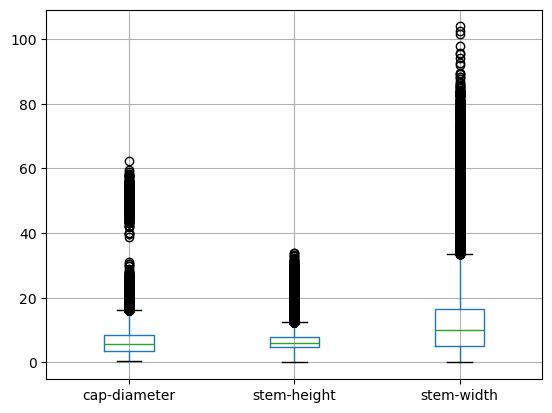

In [9]:
X.boxplot()

In [9]:
columns = ['cap-diameter', 'stem-height', 'stem-width']

for column in columns:
    # Obliczenie kwantyli dla danej kolumny
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    
    # Obliczenie IQR dla danej kolumny
    IQR = Q3 - Q1
    
    # Określenie granic wartości normalnych dla danej kolumny
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Usunięcie wartości odstających dla danej kolumny
    X = X[(X[column] >= lower_bound) & (X[column] <= upper_bound)]

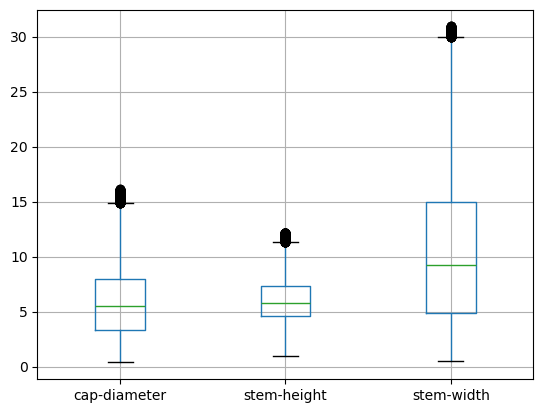

In [11]:
X.boxplot()
plt.show()

In [12]:
X.shape

(53900, 13)

In [10]:
scaler = StandardScaler()

columns_to_normalize = ['cap-diameter', 'stem-height', 'stem-width']

X[columns_to_normalize] = scaler.fit_transform(X[columns_to_normalize])

X.head()


cap-diameter cap-shape cap-color does-bruise-or-bleed gill-color  \
353      0.310464         x         n                    f          w   
354      0.835317         p         n                    f          w   
355      0.029729         p         n                    f          w   
356      0.200611         x         n                    f          w   
357      0.551530         x         n                    f          w   

     stem-height  stem-width stem-color has-ring ring-type habitat season  \
353     0.390816    0.449203          w        t         p       d      a   
354     1.463120    0.979810          w        t         p       d      a   
355     0.702587    0.318702          w        t         p       d      u   
356     0.353025    0.345950          w        t         p       d      a   
357     1.179691    0.641369          w        t         p       d      a   

    targets  
353       p  
354       p  
355       p  
356       p  
357       p

In [11]:
y = X['targets']

X.drop(columns=['targets'], inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
label_encoder = LabelEncoder()

for col in X_train.columns:
    if X_train[col].dtype == 'object' or X_train[col].dtype == 'string': 
        X_train[col] = label_encoder.fit_transform(X_train[col])
        X_test[col] = label_encoder.transform(X_test[col])

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [16]:
X_train

cap-diameter  cap-shape  cap-color  does-bruise-or-bleed  gill-color  \
56329      0.240280          3          5                     0          11   
44387     -0.193028          4          5                     0           4   
35666     -0.830786          6          6                     0           5   
8223      -0.821631          2          5                     0           7   
42307      0.786493          4         10                     0           4   
...             ...        ...        ...                   ...         ...   
12650     -1.413616          6          5                     0          10   
48231      0.432523          6          5                     0           4   
40692     -0.693469          6          5                     0           7   
1259       1.048920          6          5                     1          10   
17510      0.508810          6         10                     0          10   

       stem-height  stem-width  stem-color  has-ring  ring-type  habitat  \
56329    -2.164764    0.401878          11         0          1        0   
44387     1.340301    0.109327          10         1          6        0   
35666    -0.860993   -0.666507           6         1          6        0   
8223      0.636453   -0.943283           7         0          1        0   
42307     0.074321    0.487923          10         1          0        4   
...            ...         ...         ...       ...        ...      ...   
12650    -0.010708   -1.205719          11         0          1        0   
48231     0.811234   -0.375390           5         1          6        1   
40692    -0.369717   -0.421280          10         1          6        0   
1259      1.916605    0.885161          10         1          2        0   
17510    -0.161870    2.082613          10         0          1        4   

       season  
56329       0  
44387       1  
35666       0  
8223        0  
42307       0  
...       ...  
12650       2  
48231       2  
40692       0  
1259        2  
17510       1  

[43120 rows x 12 columns]

In [25]:
def train_and_evaluate(X_train, X_test, y_train, y_test, model_type='classification'):
    if model_type == 'classification':
        model = DecisionTreeClassifier()
        parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                      'max_depth': [10, 50, 100],
                      'min_samples_leaf': [1, 5, 10],
                      'ccp_alpha': [0.0, 0.1, 0.5]}
        scoring = 'accuracy'
    elif model_type == 'regression':
        model = DecisionTreeRegressor()
        parameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                      'max_depth': [10, 50, 100],
                      'min_samples_leaf': [1, 5, 10],
                      'ccp_alpha': [0.0, 0.1, 0.5]}
        scoring = 'neg_mean_squared_error'

    grid_search = GridSearchCV(model, parameters, scoring=scoring, cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    if model_type == 'classification':
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        plt.figure(figsize=(10, 7))
        plot_tree(best_model, filled=True, feature_names=X_train.columns.tolist(), class_names=['0', '1'])
        plt.title(f"Classification Tree\nCriterion: {best_model.criterion}, Max Depth: {best_model.max_depth}, Min Samples Leaf: {best_model.min_samples_leaf}, CCP Alpha: {best_model.ccp_alpha}")
        plt.show()
        
        return best_model, accuracy
    elif model_type == 'regression':
        y_pred = best_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        
        plt.figure(figsize=(10, 7))
        plot_tree(best_model, filled=True, feature_names=X_train.columns.tolist())
        plt.title(f"Regression Tree\nCriterion: {best_model.criterion}, Max Depth: {best_model.max_depth}, Min Samples Leaf: {best_model.min_samples_leaf}, CCP Alpha: {best_model.ccp_alpha}")
        plt.show()
        
        return best_model, mse

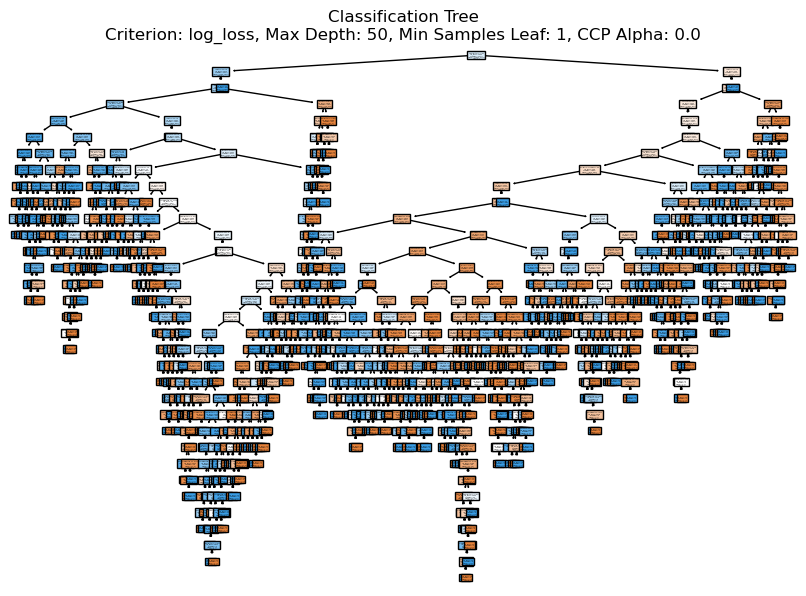

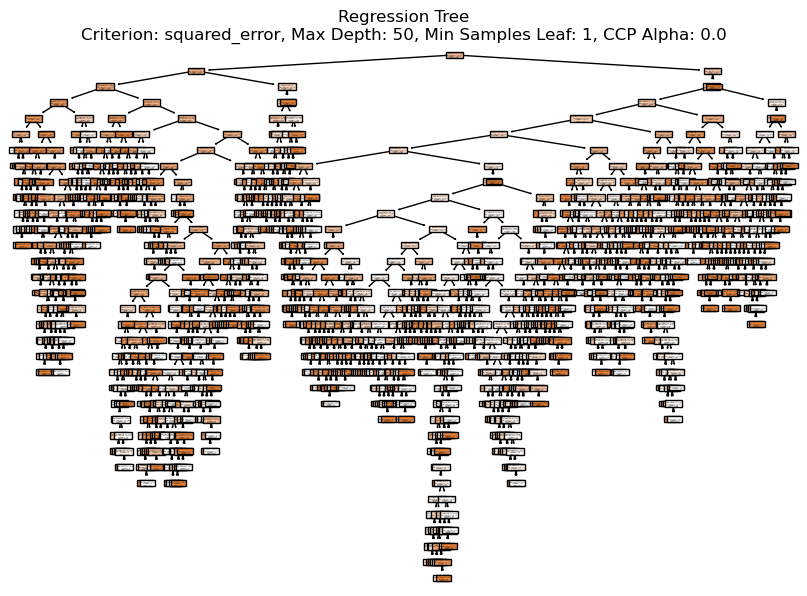

       Model Type                                         Best Model     Score
0  classification  DecisionTreeClassifier(criterion='log_loss', m...  0.986456
1      regression                DecisionTreeRegressor(max_depth=50)  0.013915


In [18]:
results = []

for model_type in ['classification', 'regression']:
    model, score = train_and_evaluate(X_train, X_test, y_train, y_test, model_type)
    results.append({'Model Type': model_type, 'Best Model': model, 'Score': score})

results_df = pd.DataFrame(results)
print(results_df)

In [22]:
results_list = results_df.values.tolist()

print(tabulate(results_list, headers=results_df.columns, tablefmt="grid"))

+----------------+------------------------------------------------------------+-----------+
| Model Type     | Best Model                                                 |     Score |
+================+============================================================+===========+
| classification | DecisionTreeClassifier(criterion='log_loss', max_depth=50) | 0.986456  |
+----------------+------------------------------------------------------------+-----------+
| regression     | DecisionTreeRegressor(max_depth=50)                        | 0.0139147 |
+----------------+------------------------------------------------------------+-----------+


In [31]:
def train_and_evaluate(X_train, X_test, y_train, y_test, model_type='classification'):
    if model_type == 'classification':
        model = DecisionTreeClassifier()
        parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
                      'max_depth': [10, 50, 100],
                      'min_samples_leaf': [1, 5, 10],
                      'ccp_alpha': [0.0, 0.1, 0.5]}
        scoring = 'accuracy'
    elif model_type == 'regression':
        model = DecisionTreeRegressor()
        parameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                      'max_depth': [10, 50, 100],
                      'min_samples_leaf': [1, 5, 10],
                      'ccp_alpha': [0.0, 0.1, 0.5]}
        scoring = 'neg_mean_squared_error'

    grid_search = GridSearchCV(model, parameters, scoring=scoring, cv=5)
    grid_search.fit(X_train, y_train)

    best_model_no_weight = grid_search.best_estimator_

    best_params_no_weight = grid_search.best_params_

    results = []

    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, weight in enumerate([None, 'balanced', {0: 0.5, 1: 0.5}, {0: 0.7, 1: 0.3}]):
        model_with_weight = DecisionTreeClassifier(**best_params_no_weight, class_weight=weight)
        model_with_weight.fit(X_train, y_train)
        y_pred = model_with_weight.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        axs[i // 2, i % 2].set_title(f"Classification Tree with Class Weight: {weight}\nCriterion: {model_with_weight.criterion}, Max Depth: {model_with_weight.max_depth}, Min Samples Leaf: {model_with_weight.min_samples_leaf}, CCP Alpha: {model_with_weight.ccp_alpha}")
        plot_tree(model_with_weight, filled=True, feature_names=X_train.columns.tolist(), class_names=['0', '1'], ax=axs[i // 2, i % 2])

        results.append({'Class Weight': weight, 'Accuracy': accuracy})

    plt.show()

    results_df = pd.DataFrame(results)

    print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

    return results_df

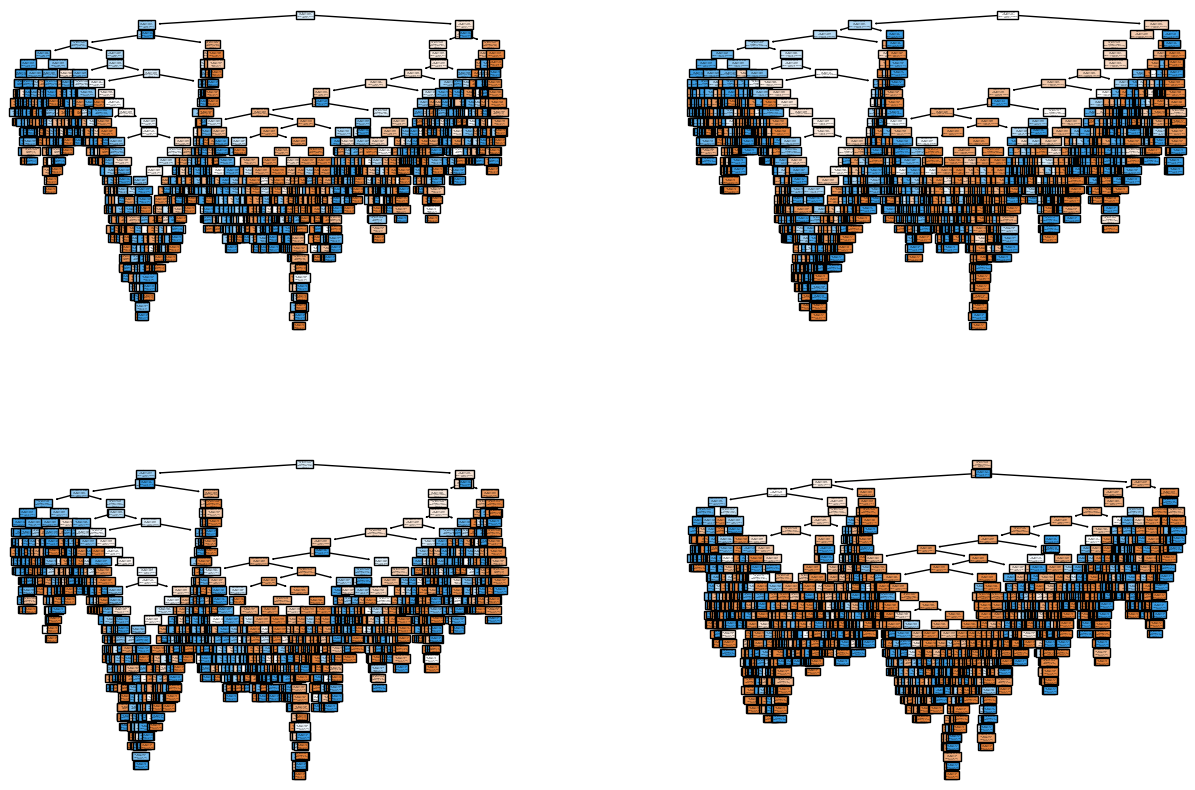

+------------------+--------------------+
|   Class Weight   |      Accuracy      |
+------------------+--------------------+
|                  | 0.9869202226345084 |
|     balanced     | 0.9895176252319109 |
| {0: 0.5, 1: 0.5} | 0.9869202226345084 |
| {0: 0.7, 1: 0.3} | 0.9897959183673469 |
+------------------+--------------------+
       Class Weight  Accuracy
0              None  0.986920
1          balanced  0.989518
2  {0: 0.5, 1: 0.5}  0.986920
3  {0: 0.7, 1: 0.3}  0.989796


In [32]:
results_df = train_and_evaluate(X_train, X_test, y_train, y_test, model_type='classification')

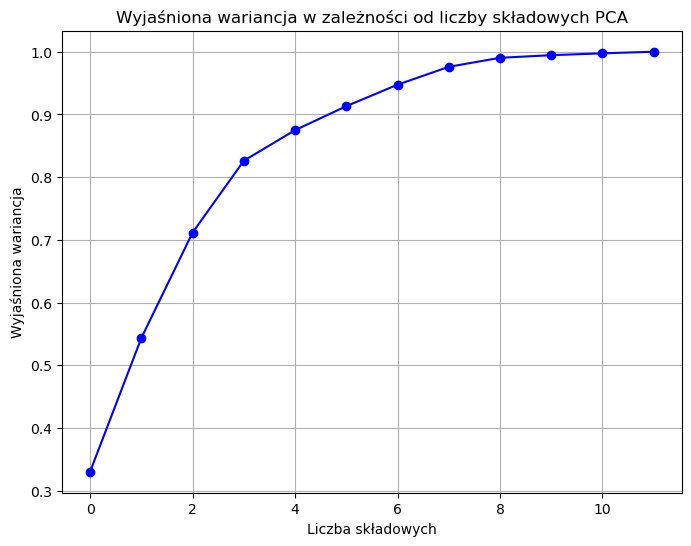

In [18]:
pca = PCA().fit(X_train)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='b')
plt.xlabel('Liczba składowych')
plt.ylabel('Wyjaśniona wariancja')
plt.title('Wyjaśniona wariancja w zależności od liczby składowych PCA')
plt.grid(True)
plt.show()

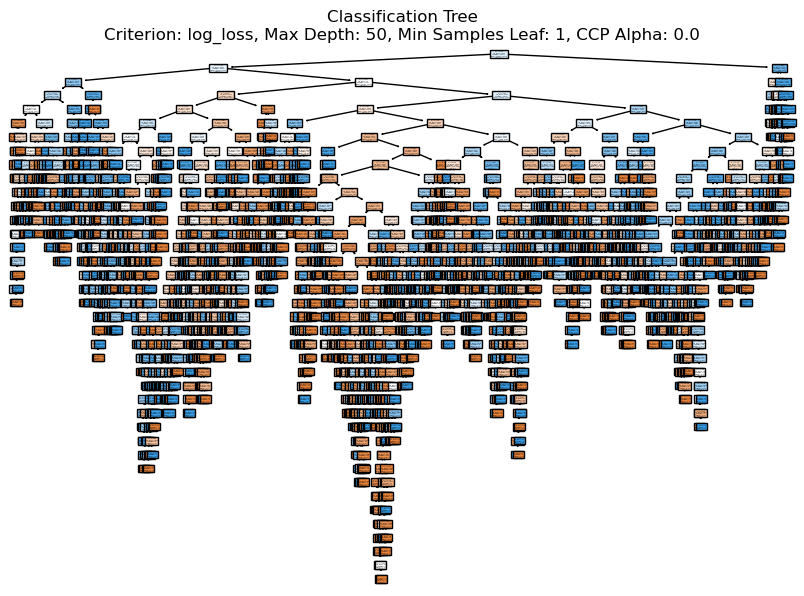

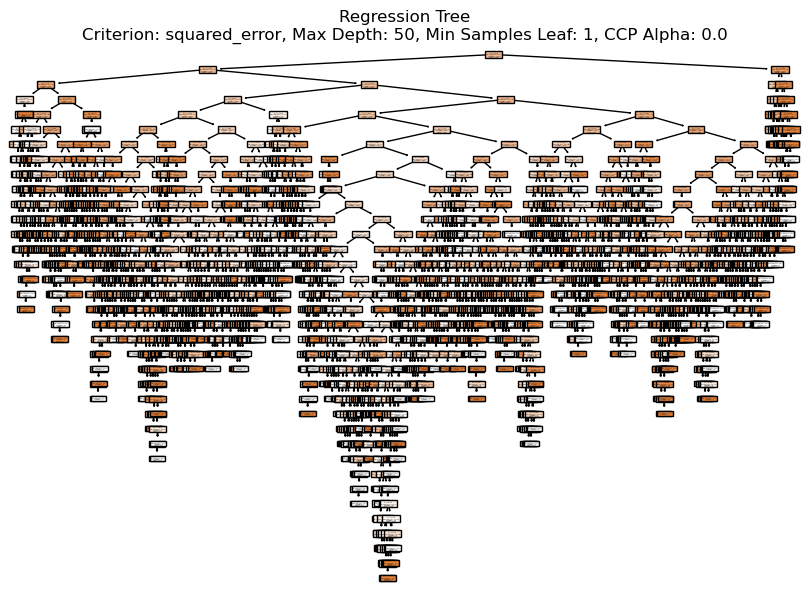

NameError: name 'tabulate' is not defined

In [19]:
results = []

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

for model_type in ['classification', 'regression']:
    model, score = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test, model_type)
    results.append({'Model Type': model_type, 'Best Model': model, 'Score': score})

results_df = pd.DataFrame(results)
print(tabulate(results_df, headers="keys", tablefmt="grid"))

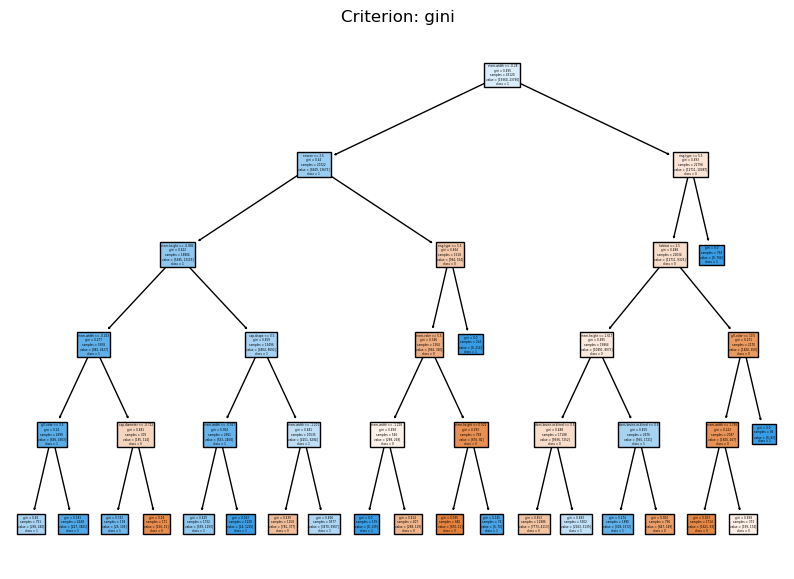

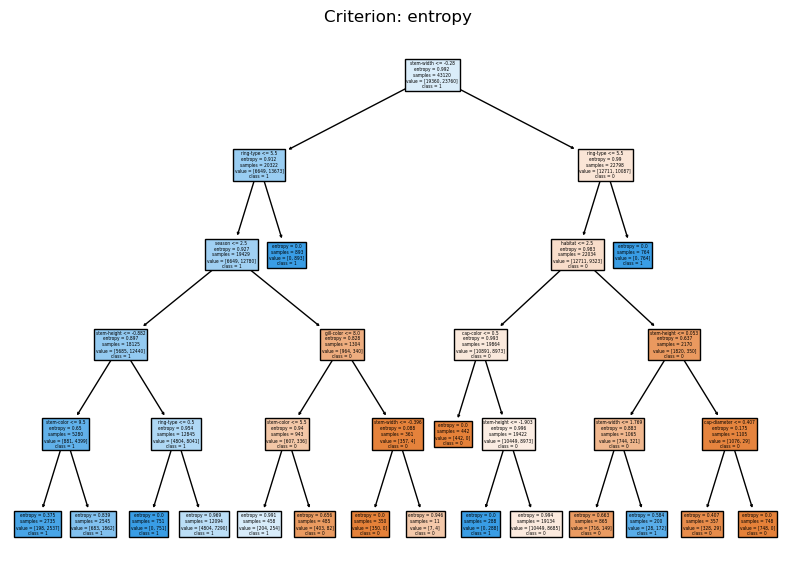

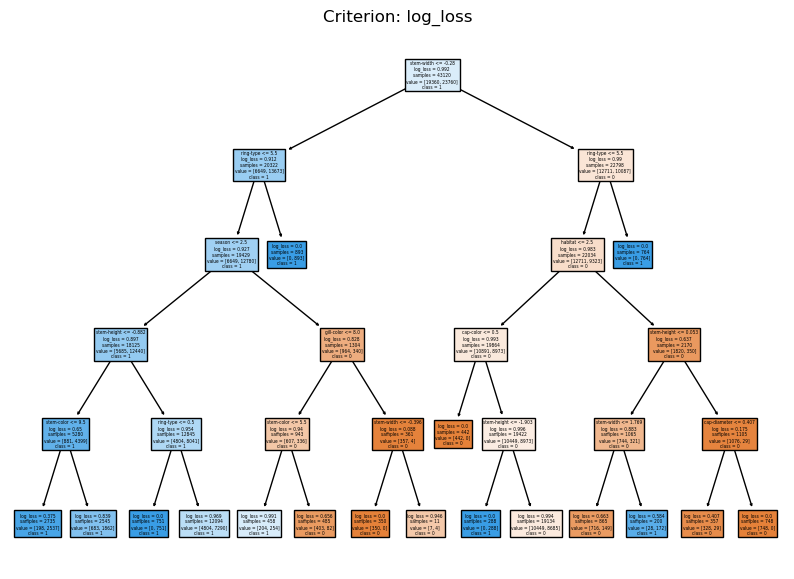

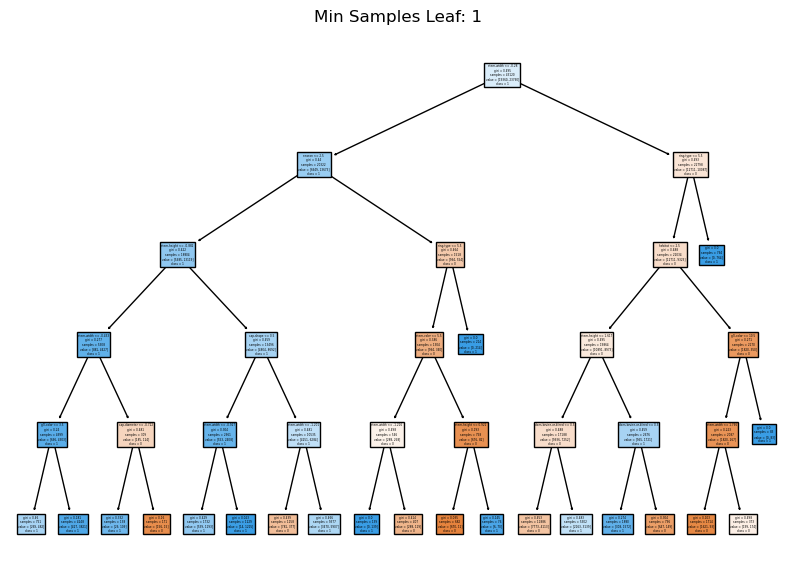

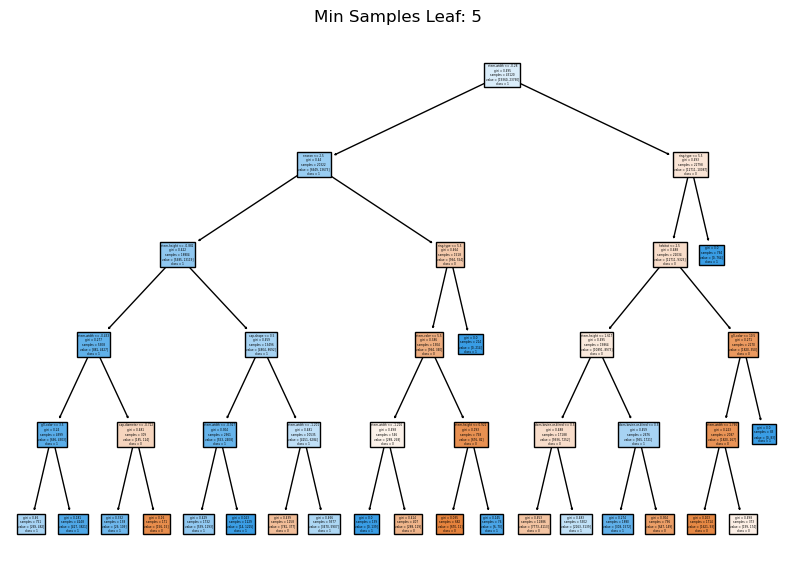

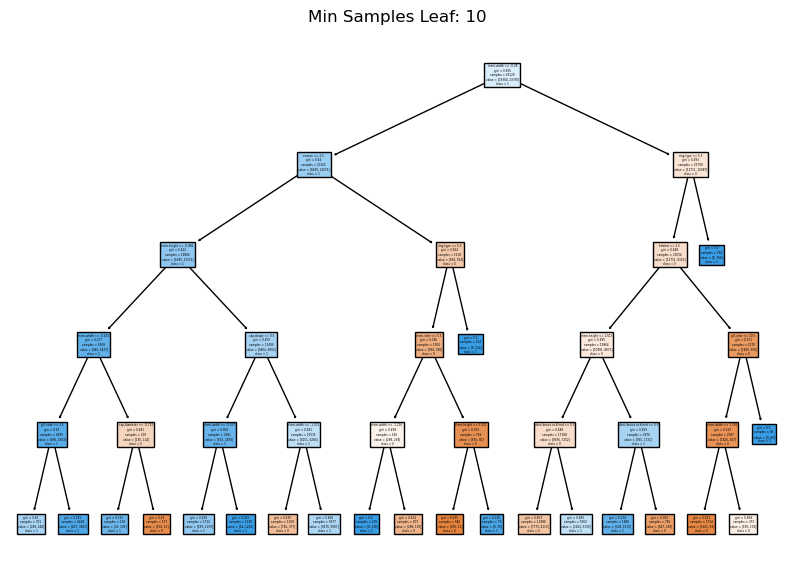

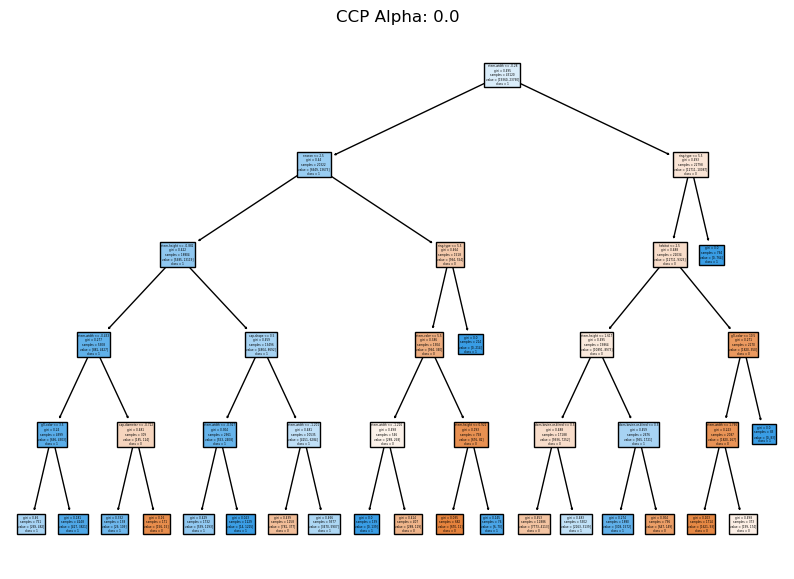

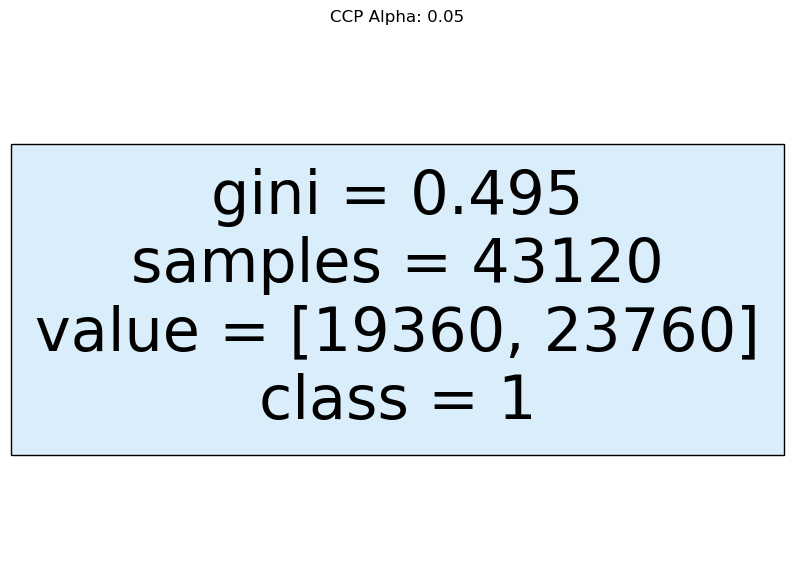

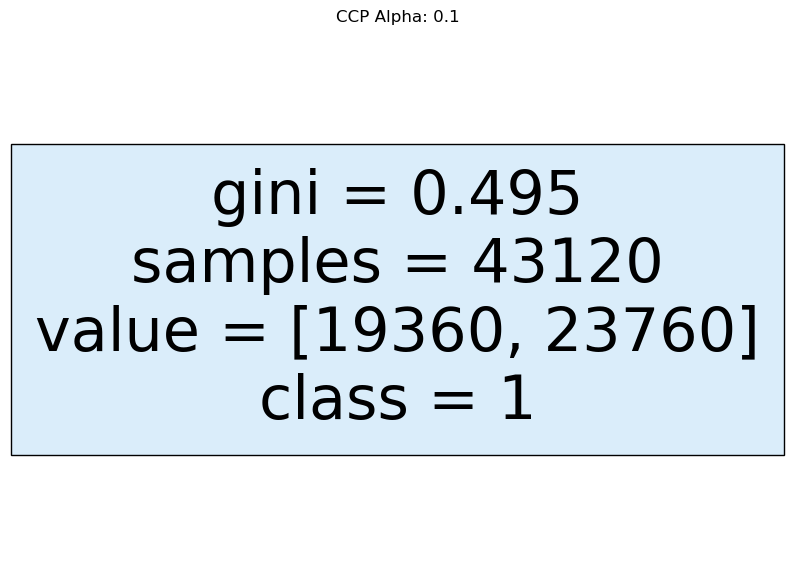

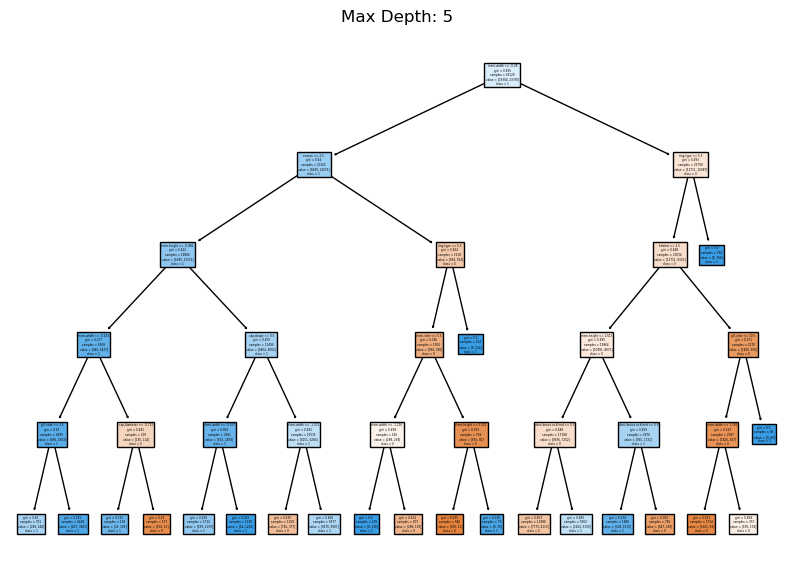

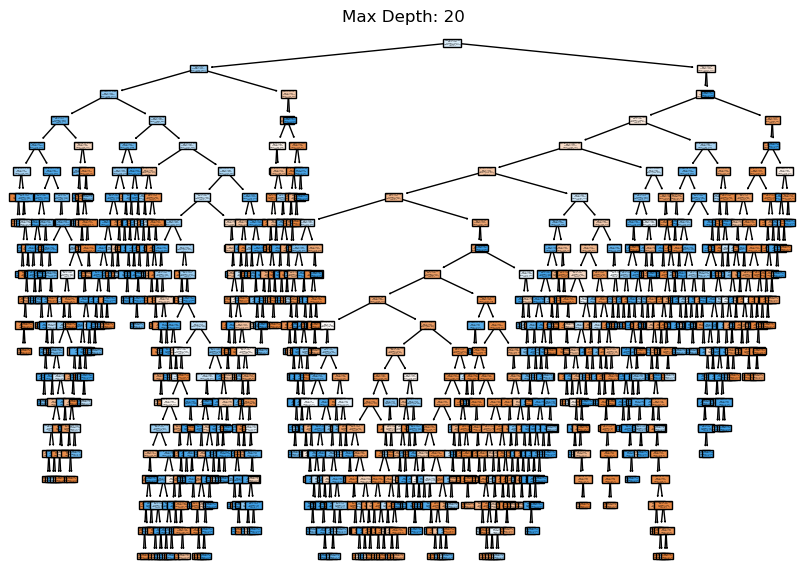

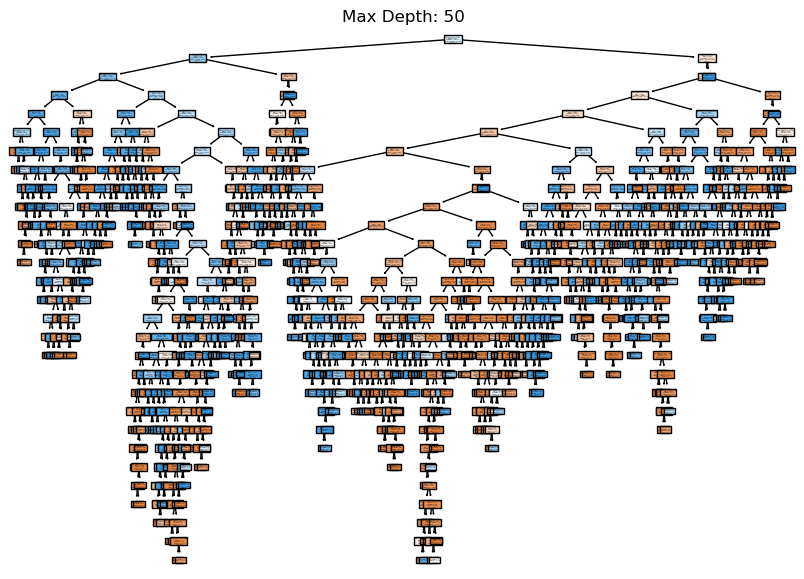

In [32]:
import matplotlib.pyplot as plt

def visualize_tree_hyperparameter(X_train, y_train, criterion_values=['gini', 'entropy', 'log_loss'], min_samples_leaf_values=[1, 5, 10], ccp_alpha_values=[0.0, 0.05, 0.1], max_depth_values=[5, 20, 50]):
    for criterion in criterion_values:
        model = DecisionTreeClassifier(criterion=criterion, max_depth=5, min_samples_leaf=5, ccp_alpha=0)
        model.fit(X_train, y_train)
        
        plt.figure(figsize=(10, 7))
        plot_tree(model, filled=True, feature_names=X_train.columns.tolist(), class_names=['0', '1'])
        plt.title(f"Criterion: {criterion}")
        plt.show()

    for min_samples_leaf in min_samples_leaf_values:
        model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=min_samples_leaf, ccp_alpha=0)
        model.fit(X_train, y_train)
        
        plt.figure(figsize=(10, 7))
        plot_tree(model, filled=True, feature_names=X_train.columns.tolist(), class_names=['0', '1'])
        plt.title(f"Min Samples Leaf: {min_samples_leaf}")
        plt.show()

    for alpha in ccp_alpha_values:
        model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, ccp_alpha=alpha)
        model.fit(X_train, y_train)
        
        plt.figure(figsize=(10, 7))
        plot_tree(model, filled=True, feature_names=X_train.columns.tolist(), class_names=['0', '1'])
        plt.title(f"CCP Alpha: {alpha}")
        plt.show()
                
    for max_depth in max_depth_values:
        model = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=5, ccp_alpha=0)
        model.fit(X_train, y_train)
        
        plt.figure(figsize=(10, 7))
        plot_tree(model, filled=True, feature_names=X_train.columns.tolist(), class_names=['0', '1'])
        plt.title(f"Max Depth: {max_depth}")
        plt.show()

visualize_tree_hyperparameter(X_train, y_train)
